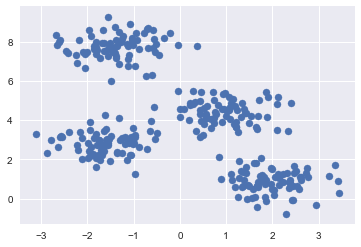

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings;warnings.simplefilter('ignore')

%matplotlib inline
from sklearn.model_selection import train_test_split
#for plot styling
import seaborn as sns;sns.set()
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4,cluster_std= 0.60,random_state=0)
plt.scatter(X[:,0],X[:,1], s=50)

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [10]:
y_kmeans

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0])

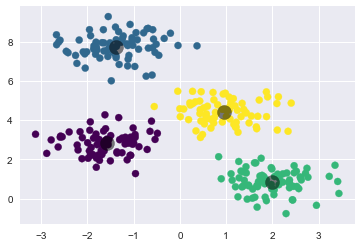

In [11]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X,n_clusters,rseed = 2):
    #1. Randlomly choose clusters
    rng = np.random.RandomState(rseed)
    i= rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #2a.Assign labels based on closest center
        labels =pairwise_distances_argmin(X,centers)
        
        #2b.Find new center from mean of points
        new_centers = np.array([X[labels== i].mean(0) for i in range(n_clusters)])
        
        #2c. check for convergence
        if np.all(centers == new_centers):
            break 
        centers = new_centers
        
    return centers, labels

centers,labels =find_clusters(X,4)
plt.scatter(X[:,0],X[:,1], c = y_kmeans , s= 50, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], c='black', s=200, alpha = 0.5)

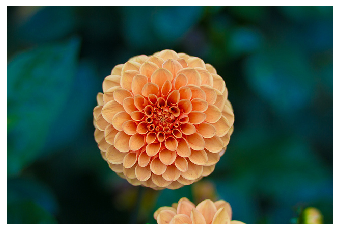

In [60]:
from sklearn.datasets import load_sample_image
india = load_sample_image("flower.jpg")
ax = plt.axes(xticks = [],yticks=[])
ax.imshow(india)
#16 millions colors

In [51]:
india.shape
# 3 is rgb (red,green,blue)
#427 pixel * 640 pixel image

(427, 640, 3)

In [52]:
india

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [53]:
# since india values in the array is large, so we will create a new data
data = india/255.0 # use 0 ....1 scale
data = data.reshape(427* 640, 3)
data.shape

(273280, 3)

In [54]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [55]:
def plot_pixels(data, title,colors = None, N=10000):
    if colors is None:
        colors = data
        
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2,figsize= (16,6))
    ax[0].scatter(R,G,color=colors, marker = '.')
    ax[0].set(xlabel= 'Red',ylabel='Green',xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R,G,color=colors, marker = '.')
    ax[1].set(xlabel= 'Red',ylabel='Blue',xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title,size=20)

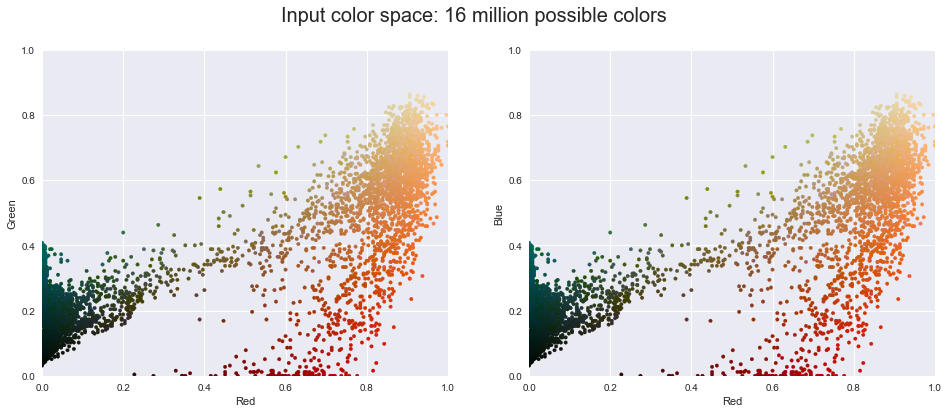

In [56]:
plot_pixels(data,title = "Input color space: 16 million possible colors")

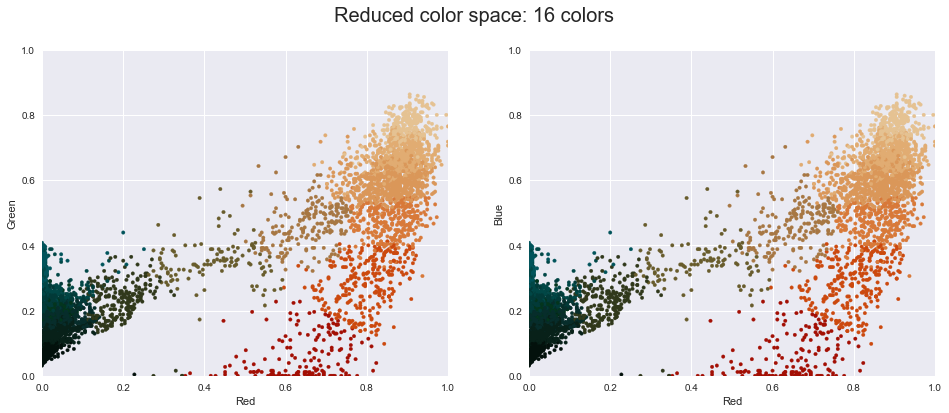

In [57]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data ,colors= new_colors, title = "Reduced color space: 16 colors")
    

Text(0.5,1,'16-color Image')

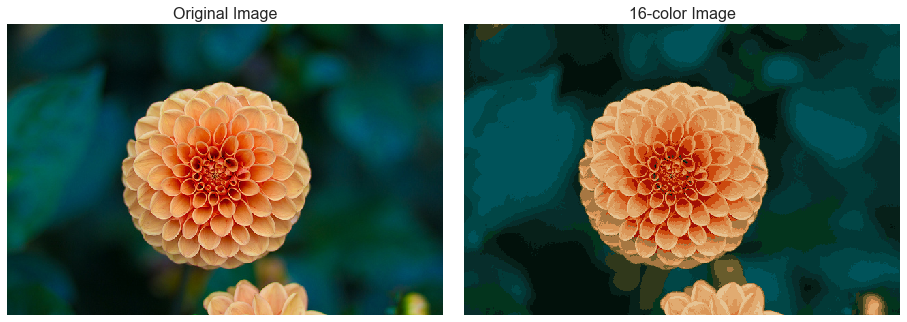

In [58]:
india_recolored= new_colors.reshape(india.shape)

fig,ax = plt.subplots(1,2,figsize= (16,6), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(india)
ax[0].set_title('Original Image',size=16)
    
ax[1].imshow(india_recolored)
ax[1].set_title('16-color Image',size=16)
